# Task 2 - Model Building and Training

In [1]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.data_preprocessing import (
    handle_missing_values, clean_data, merge_datasets,
    engineer_features, transform_data
)
from src.model_training import main


## Data Preparation:
- From previous task i have already prepared and transformed data

In [ ]:

# Load and preprocess data
fraud_data = pd.read_csv('F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/data/raw/Fraud_Data.csv')[0]
ip_data = pd.read_csv('F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/data/raw/creditcard.csv')[0]
fraud_data = handle_missing_values(fraud_data)
fraud_data = clean_data(fraud_data)
fraud_data = merge_datasets(fraud_data, ip_data)
fraud_data = engineer_features(fraud_data)
X_transformed, y, preprocessor = transform_data(fraud_data, target_col='class', train=True)


# loading of prepared data
# model selection 
# model training and evaluation


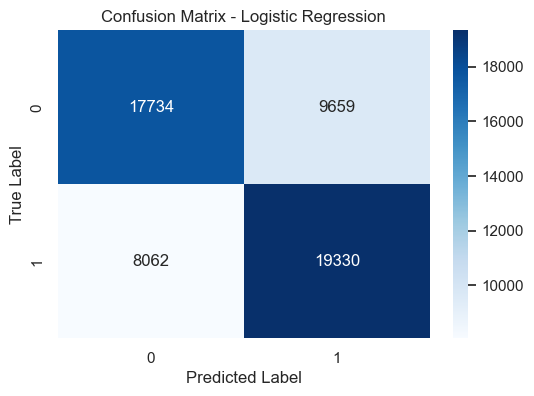

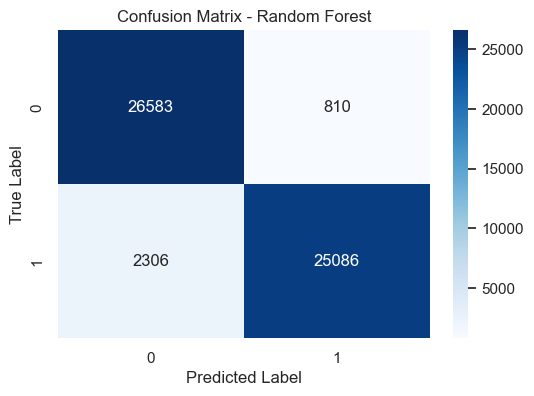

Model Evaluation Results:

Logistic Regression:
AUC-PR: 0.8036
F1-Score: 0.6857
Confusion Matrix:
[[17734  9659]
 [ 8062 19330]]

Random Forest:
AUC-PR: 0.9878
F1-Score: 0.9415
Confusion Matrix:
[[26583   810]
 [ 2306 25086]]

Best Model: Random Forest
Justification: The best model is chosen based on the highest F1-Score, as it balances precision and recall, which is critical for imbalanced data. AUC-PR is used as a secondary metric to evaluate performance on the minority class.


,Logistic Regression,Random Forest
AUC-PR,0.8036,0.987804
F1-Score,0.685692,0.941525
Confusion Matrix,"[[17734, 9659], [8062, 19330]]","[[26583, 810], [2306, 25086]]"


In [ ]:

# Combine transformed features and target
processed_data = pd.read_csv('F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/data/transformed_features.csv')
processed_data['class'] = pd.read_csv('F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/data/target_labels.csv')
# Run model training and evaluation
models, results, best_model = main(processed_data)
# TO display results as table
results_df = pd.DataFrame(results)
results_df.to_csv('F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/data/model_results.csv', index=False)
display(results_df)


## to keep model for the next task

In [14]:
# to save best model as .joblib file
import joblib
joblib.dump(best_model, 'F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/data/random_forest.joblib')
print("Best model saved as 'best_model.joblib'")


Best model saved as 'best_model.joblib'


In [18]:
#to plot the model performance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(results['model'], results['f1_score'], color='skyblue')
plt.xlabel('F1 Score')
plt.title('Model Performance Comparison')
plt.grid(axis='x')
#plt.savefig('F:/Detection-of-fraud-cases-for-e-commerce-and-bank-transactions/plots/model_performance.png')
plt.show()


KeyError: 'model'

<Figure size 1000x600 with 0 Axes>